# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(mouse_metadata, study_results, how = 'left', on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count_uncleaned = len(mouse_study_data.groupby("Mouse ID")["Mouse ID"])
mice_count_uncleaned

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mouse_ID_time = pd.DataFrame(mouse_study_data.groupby("Mouse ID")["Mouse ID"].count())
mouse_duplicates_df = mouse_ID_time.loc[(mouse_ID_time["Mouse ID"] > 10)]
mouse_duplicates = list(mouse_duplicates_df.index)
mouse_duplicates

['g989']

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = mouse_study_data[(mouse_study_data["Mouse ID"] == 'g989')]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [207]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_data_clean = mouse_study_data[(mouse_study_data["Mouse ID"] != 'g989')]

In [209]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(mouse_study_data_clean.groupby("Mouse ID")["Mouse ID"])
mice_count

248

## Summary Statistics

In [211]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Compute statistical values and insert each into a DataFrame
drug_mean = pd.DataFrame(mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
drug_mean = drug_mean.rename(columns = {'Tumor Volume (mm3)' : 'Mean Tumor Volume'})
drug_median = pd.DataFrame(mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
drug_median = drug_median.rename(columns = {"Tumor Volume (mm3)": "Median Tumor Volume"})
drug_variance = pd.DataFrame(mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
drug_variance = drug_variance.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Variance"})
drug_std_dev = pd.DataFrame(mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
drug_std_dev = drug_std_dev.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
drug_SEM = pd.DataFrame(mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
drug_SEM = drug_SEM.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

# Create DataFrame containing all statistical values
drug_summary = pd.merge(drug_mean, drug_median, how = 'left', on = ["Drug Regimen"])
drug_summary.rename(columns = {"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Median Tumor Volume"})
drug_summary = pd.merge(drug_summary, drug_variance, how = 'left', on = ["Drug Regimen"])
drug_summary = pd.merge(drug_summary, drug_std_dev, how = 'left', on = ["Drug Regimen"])
drug_summary = pd.merge(drug_summary, drug_SEM, how = 'left', on = ["Drug Regimen"])

# Print summary
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

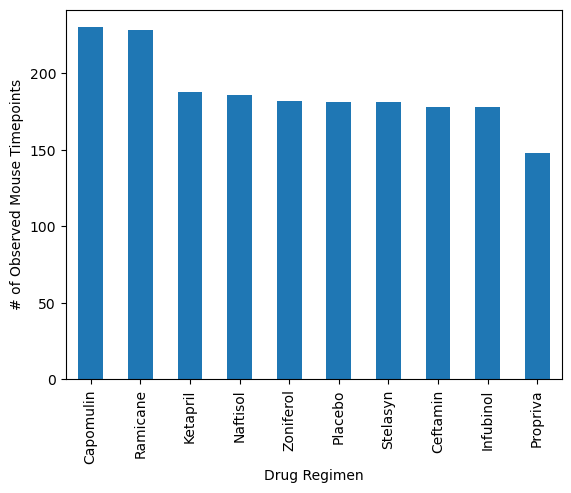

In [213]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_time_counts = pd.DataFrame(mouse_study_data_clean.groupby("Drug Regimen")["Drug Regimen"].count())
drug_time_counts = drug_time_counts.rename(columns = {"Drug Regimen": "Timepoints"})
drug_time_counts = drug_time_counts.sort_values("Timepoints", ascending = [False])
drug_plot_pd = drug_time_counts.plot.bar(xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints',legend = False)

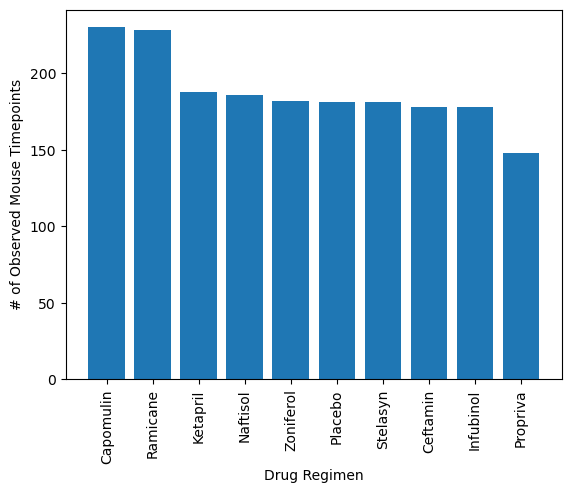

In [215]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drugs = list(drug_time_counts.index)
timepoints = list(drug_time_counts["Timepoints"])
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
drug_plot_plt = plt.bar(drugs, timepoints)

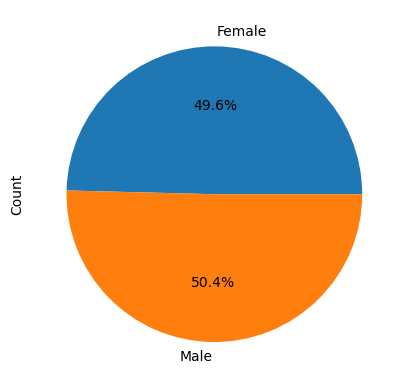

In [217]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_metadata_df = pd.DataFrame(mouse_metadata)
mouse_metadata_clean = mouse_metadata_df[(mouse_metadata_df["Mouse ID"] != 'g989')]
mice = pd.DataFrame(mouse_metadata_clean)
mice_ID_sexes = mice.drop(columns = ["Drug Regimen", "Age_months", "Weight (g)"])

# Make the pie chart
sex_count = mice_ID_sexes.groupby("Sex").count()
sex_count = sex_count.rename(columns = {"Mouse ID" : "Count"})
sex_plot = sex_count.plot.pie(y="Count",autopct='%1.1f%%',legend = False)


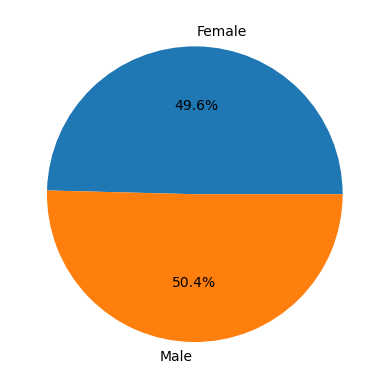

In [219]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
sexes = list(sex_count.index)
sex_counts = list(sex_count["Count"])
sex_plot_plt = plt.pie(sex_counts,autopct='%1.1f%%', labels=["Female","Male"])

## Quartiles, Outliers and Boxplots

In [311]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_study_data_clean = mouse_study_data_clean.reset_index()
mouse_study_data_clean = mouse_study_data_clean.drop(columns=["index"])
mouse_timepoint_counts = pd.DataFrame(mouse_study_data_clean.groupby("Mouse ID")["Timepoint"].count())
mouse_timepoint_counts = mouse_timepoint_counts.rename(columns = {"Timepoint":"Number of Timepoints"})

rows = list(mouse_timepoint_counts["Number of Timepoints"])
last_row = list()
final_vol = list()
drug_reg = list()
k=0
for i in rows:
    k = k + i
    drug_reg.append(mouse_study_data_clean.loc[k-1,"Drug Regimen"])
    last_row.append(mouse_study_data_clean.loc[k-1,"Timepoint"])
    final_vol.append(mouse_study_data_clean.loc[k-1,"Tumor Volume (mm3)"])

mice_IDs = mice_ID_sexes.drop(columns = ["Sex"])
mice_IDs_list = list(mice_IDs.loc[:,"Mouse ID"])
last_time_points = pd.DataFrame({"Mouse ID" : mice_IDs_list, "Drug Regimen": drug_reg, "Final Timepoint" : last_row, "Final Tumor Volume (mm3)" : final_vol})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_w_final_pt = pd.merge(mouse_study_data_clean,last_time_points, how = "left", on = ["Mouse ID", "Mouse ID"])

In [327]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_vols = list()
ram_vols = list()
inf_vols = list()
cef_vols = list()

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in range(247):

    # Locate the rows which contain mice on each drug and get the tumor volumes
    if last_time_points.loc[i,"Drug Regimen"] == "Capomulin":
        cap_vols.append(last_time_points.loc[i,"Final Tumor Volume (mm3)"])
    elif last_time_points.loc[i,"Drug Regimen"] == "Ramicane":
        ram_vols.append(last_time_points.loc[i,"Final Tumor Volume (mm3)"])
    elif last_time_points.loc[i,"Drug Regimen"] == "Infubinol":
        inf_vols.append(last_time_points.loc[i,"Final Tumor Volume (mm3)"])
    elif last_time_points.loc[i,"Drug Regimen"] == "Ceftamin":
        cef_vols.append(last_time_points.loc[i,"Final Tumor Volume (mm3)"])

    # add subset


    # Determine outliers using upper and lower bounds


In [329]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [331]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


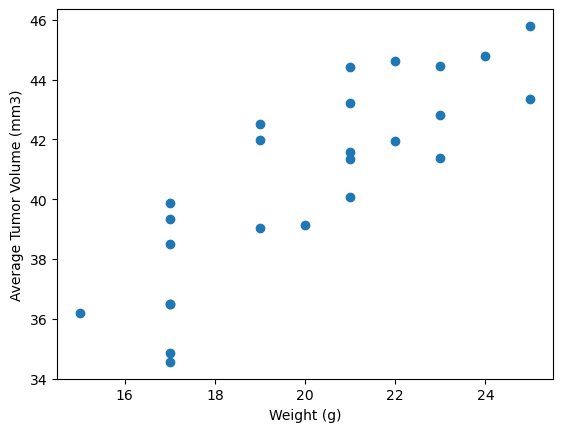

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [333]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
